In [6]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import aot
import os
import sys
from nilearn.plotting import view_img


def calculate_tsnr(time_series):  # tsnr for bold data
    """
    Calculate the temporal signal-to-noise ratio (tSNR) for a given time series.
    tSNR is the mean of the time series divided by its standard deviation.
    """
    return np.mean(time_series, axis=3) / np.std(time_series, axis=3)


datasample = "/tank/shared/2022/arrow_of_time/derivatives/fmripreps/aotfull_preprocs/fullpreprocFinal_nofmriprepstc/sub-002/ses-01/func/sub-002_ses-01_task-AOT_run-1_space-T1w_desc-preproc_bold.nii.gz"
# load data
data = nib.load(datasample)
data = data.get_fdata()
print(data.shape)
# calculate tsnr
tsnr = calculate_tsnr(data)
# plot
print(tsnr.shape)

(82, 101, 82, 368)
(82, 101, 82)


/tmp/ipykernel_200658/3585178756.py:15: RuntimeWarning: invalid value encountered in true_divide
  return np.mean(time_series, axis=3) / np.std(time_series, axis=3)


(82, 101, 82)



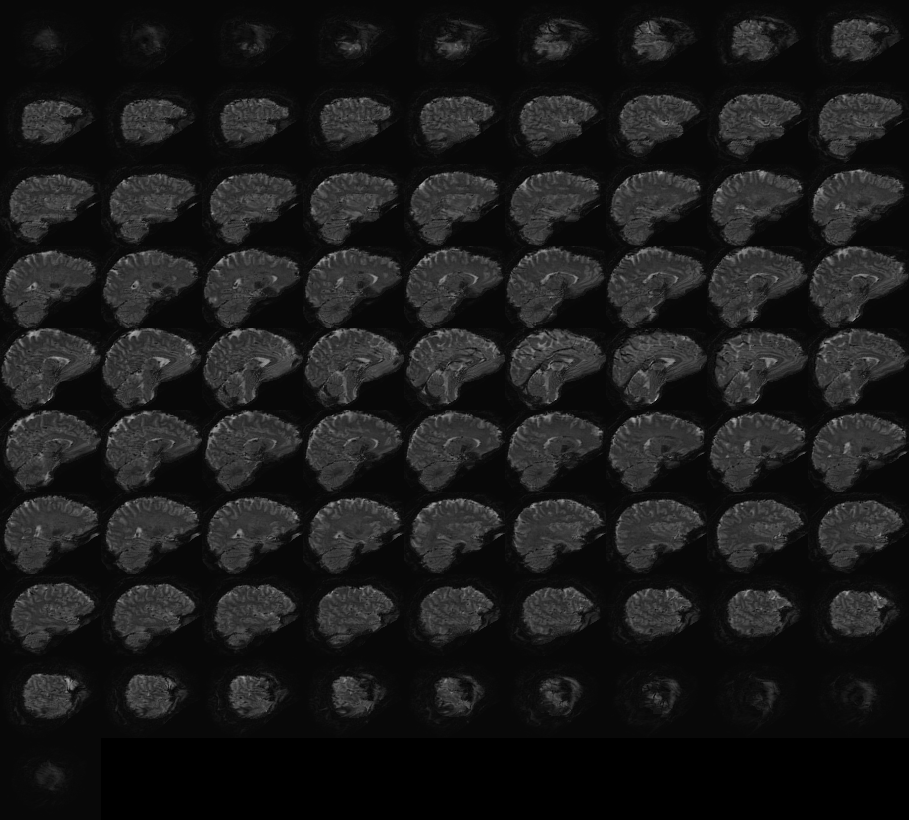
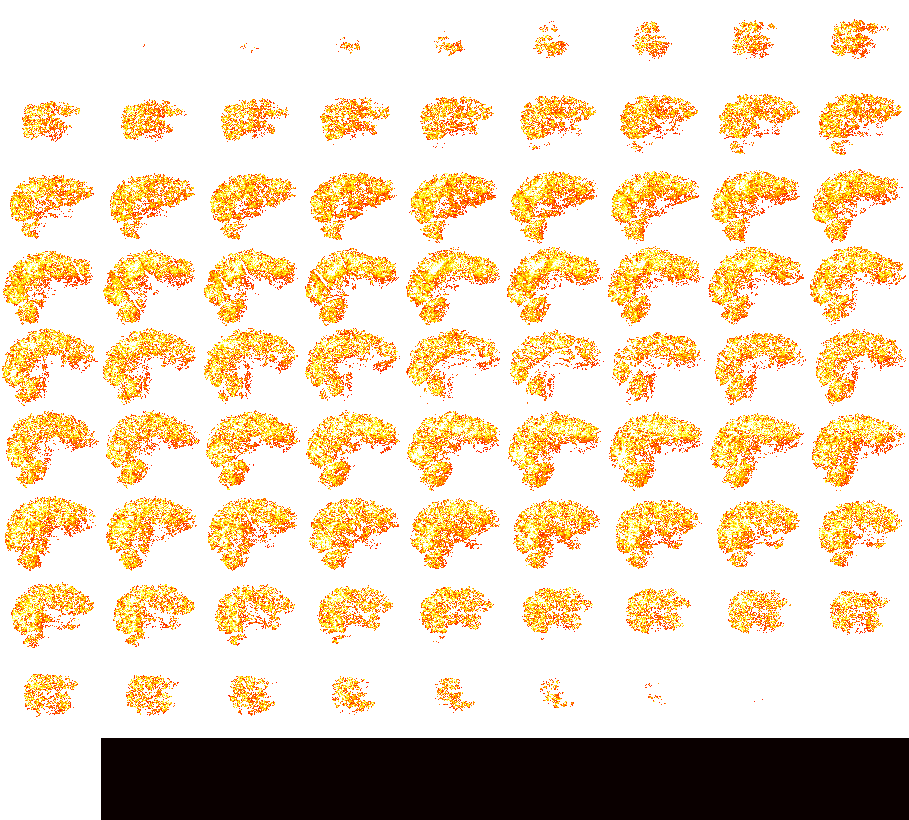

In [11]:
orig_image_fn = "/tank/shared/2022/arrow_of_time/derivatives/fmripreps/aotfull_preprocs/fullpreproc03/sub-002/ses-01/func/sub-002_ses-01_task-AOT_run-1_space-T1w_desc-preproc_bold.nii.gz"
bg_image_fn = "/tank/shared/2022/arrow_of_time/derivatives/fmripreps/aotfull_preprocs/fullpreproc03/sub-002/ses-01/func/sub-002_ses-01_task-AOT_run-1_space-T1w_boldref.nii.gz"
bm_image_fn = "/tank/shared/2022/arrow_of_time/derivatives/fmripreps/aotfull_preprocs/fullpreproc03/sub-002/ses-01/func/sub-002_ses-01_task-AOT_run-1_space-T1w_desc-brain_mask.nii.gz"


bmask = nib.load(bm_image_fn).get_fdata().astype(bool)

print(bmask.shape)
tsnr_masked = np.zeros_like(tsnr)  #
tsnr_masked[bmask] = tsnr[bmask]
# betamean_masked = np.zeros_like(betamean)
# betamean_masked[bmask] = betamean[bmask]


orig_image = nib.load(orig_image_fn)
tsnr_img = nib.Nifti1Image(tsnr_masked, affine=orig_image.affine, header=orig_image.header)
# betamean_img = nib.Nifti1Image(betamean_masked, affine=orig_image.affine, header=orig_image.header)

view_img(
    tsnr_img, threshold=40, vmax=99, cmap="hot", symmetric_cmap=False, bg_img=bg_image_fn
)
# view_img(R2_img, cmap='hot', symmetric_cmap=False, bg_img=bg_image_fn)
# view_img(betamean_img, threshold=0.5, vmax=1, cmap='hot', symmetric_cmap=False, bg_img=bg_image_fn)